# Wrangle WeRateDogs Twitter Data
> **Mariam Garuba**

![dog](tweet_dog.jpg)
_____
### Gathering Data
The project gathers three pieces of data as described below:

- Twitter archive file: This can be downloaded manually via [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) and read into a pandas DataFrame.

- The tweet image predictions: This is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: [tweet_image_predictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). The results is a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponds to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

- tweet's JSON data should be written to its own line. Then read line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 
______

In [1]:
import pandas as pd
import json
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
%matplotlib inline
import re

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
with open('tweet-json.txt') as file:
    tweets = [json.loads(line) for line in file if line]

tweet_json_df = pd.DataFrame(tweets)
tweet_json_df.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN


In [4]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
image_prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t', encoding='utf-8')
# Quick check to the file content and structure
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assessing Data
After gathering all three pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues.

You need to use two types of assessment:

- Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
- Programmatic assessment: pandas' functions and/or methods are used to assess the data.
________

### Quality

>1. Remove the leading html tags from the `source` column.
>2. Remove records that are retweeted and replied.
>3. drop columns with null values.
>4. convert datatypes of `timestamp` and `tweet_id` columns
>5. non-dog names in `name` column 
>6. drop null values in the `expanded_urls` column
>7. extract the ratings from `text` column 
>8. extract correct values for `rating_numerator` and `rating_denominator` 
>9. change `rating_numerator` datatype to float 
>10  change `rating_denominator` datatype to int
________


### Tidiness  
>1. Melt the `doggo`, `floofer`, `pupper` and `puppo` columns as dog_stages column.
>2. merge the three tables as one and drop all duplicated rows.
_______

## Cleaning Data

>- Before you perform the cleaning, you will make a copy of the original data.
>- Clean all of the issues you documented while assessing.
>- During cleaning, use the **define-code-test framework** and clearly document it.
>- Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality >and tidy master pandas DataFrame (or DataFrames, if appropriate).
_______

In [5]:
twitter_archive_clean = twitter_archive_df.copy()

image_pred_clean = image_prediction_df[['tweet_id', 'jpg_url', 'img_num']].copy()

tweet_json_clean = tweet_json_df[['id_str', 'retweet_count', 'favorite_count']].copy()

## Data Quality Issues

#### 1. Split the `source` column to extract the text 
> #### Define
>- Remove the leading html tags from the source column  
>- convert the source column to category type.

>#### Code

In [6]:
def split_source(x):
    """ splits by a delimiter and replace the end tag. """
    x = x.split('>')[1].replace('</a', '')
    return x

twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(split_source)

>#### Test

In [7]:
twitter_archive_clean['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

#### 2. Remove records that are retweeted and replied.
> #### Define
>- drop rows that are that are retweeted and replied.  

>#### Code

In [8]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isna()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isna()]

>#### Test

In [9]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### 3. Drop columns with NaN values that are not important to the analysis
> #### Define
>- Drop 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns

>#### Code

In [10]:
twitter_archive_clean.drop(
    columns=['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id',
             'retweeted_status_user_id', 'retweeted_status_timestamp'], 
    axis=1, inplace=True)

>#### Test

In [11]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### 4.  Convert datatypes
>#### Define
>- change dtype of `timestamp` from object to datetime format. 
>- change dtype of `tweet_id` column to object as we are not performing any operations on them.

>#### Code

In [12]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

>#### Test

In [13]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### 5.  Non-names on `name` column
>#### Define
>- filter out values that are not dog names ie 'very', 'like', 'his', 'my', 'not', 'this'
>- fill with NAN

>#### Code

In [38]:
names = ['None', 'a', 'an', 'all', 'very', 'like', 'his', 'my', 'not', 'this', 'unacceptable', 'such','getting', 'the',
        'just', 'one',  'quite', 'actually', 'mad', 'space', 'infuriating', 'officially', '0','O', 'old', 'life', 
        'incredibly', 'by']

for name in twitter_archive_clean.name.copy():
    if name in names:
        twitter_archive_clean.name[twitter_archive_clean.name == name] = np.nan

>#### Test

In [15]:
twitter_archive_clean[twitter_archive_clean['name'].isin(names)]['name']

Series([], Name: name, dtype: object)

#### 6.  drop null values in the `expanded_urls` column
>#### Define
>- filter and drop nan values

>#### Code

In [16]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['expanded_urls'].isna()]

>#### Test

In [17]:
twitter_archive_clean['expanded_urls'].isna().sum()

0

#### 7.  Extract the ratings from `text` column 
>#### Define
>- filter the correct rating for each tweet.

>#### Code

In [18]:
rating = twitter_archive_clean.text.str.extractall(r'(\d+\.\d+\/\d+)|(\d+\/\d+)').reset_index().drop_duplicates('level_0')

rating = rating.melt(value_vars=[0,1],id_vars='level_0', value_name='ratings').dropna().drop('variable', axis=1)

twitter_archive_clean = twitter_archive_clean.reset_index()
twitter_archive_clean = twitter_archive_clean.merge(rating, left_on='index', right_on='level_0')

>#### Test

In [19]:
twitter_archive_clean['ratings'].value_counts()

12/10       485
10/10       434
11/10       413
13/10       287
9/10        152
8/10         98
7/10         51
14/10        38
5/10         33
6/10         32
3/10         19
4/10         15
2/10          9
1/10          4
7/11          1
44/40         1
60/50         1
121/110       1
11.26/10      1
80/80         1
144/120       1
88/80         1
420/10        1
45/50         1
1776/10       1
99/90         1
50/50         1
4/20          1
204/170       1
9/11          1
165/150       1
11.27/10      1
9.75/10       1
24/7          1
84/70         1
0/10          1
13.5/10       1
1/2           1
Name: ratings, dtype: int64

#### 8.  extract corrcet values for `rating_numerator` 
>#### Define
>- pull the rating_numerator from the correctly extracted rating
>- change rating_numerator datatype to float 

>#### Code

In [20]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['ratings'].apply(lambda x: float(x.split("/")[0]))

>#### Test

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   index               2094 non-null   int64              
 1   tweet_id            2094 non-null   object             
 2   timestamp           2094 non-null   datetime64[ns, UTC]
 3   source              2094 non-null   object             
 4   text                2094 non-null   object             
 5   expanded_urls       2094 non-null   object             
 6   rating_numerator    2094 non-null   float64            
 7   rating_denominator  2094 non-null   int64              
 8   name                1390 non-null   object             
 9   doggo               2094 non-null   object             
 10  floofer             2094 non-null   object             
 11  pupper              2094 non-null   object             
 12  puppo               2094 non-null 

#### 9.  `rating_denominator` datatype isn't int 
>#### Define
>- pull the rating_denominator from the correctly extracted rating
>- change rating_denominator datatype to int
>- drop 'ratings', 'index', 'level_0' columns

>#### Code

In [22]:
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['ratings'].apply(lambda x: int(x.split("/")[1]))
twitter_archive_clean.drop(['ratings', 'index', 'level_0'], axis=1, inplace=True)

>#### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   int64              
 7   name                1390 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

## Data Tidiness

#### 1. Melt the `doggo`, `floofer`, `pupper` and `puppo`  columns as `dog_stages` column. 
> #### Define
>- changes the format of `doggo`, `floofer`, `pupper` and `puppo`  columns from wide to long

> #### Code

In [24]:
def replace_name(col):
    return col.replace('None', '', inplace=True)

replace_name(twitter_archive_clean.doggo)
replace_name(twitter_archive_clean.floofer)
replace_name(twitter_archive_clean.pupper)
replace_name(twitter_archive_clean.puppo)

twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer\
                                                + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [25]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

twitter_archive_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1, inplace=True)

> #### Test

In [26]:
twitter_archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   int64              
 7   name                1390 non-null   object             
 8   dog_stage           335 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(6)
memory usage: 163.6+ KB


#### 2. merge tables
> #### Define
>- merge all three tables together.
>- drop all duplicated rows.

>#### Code

In [28]:
twitter_achive_master = twitter_archive_clean.merge(tweet_json_clean, right_on='id_str', left_on="tweet_id")\
                            .merge(image_pred_clean, on="tweet_id", how='left')

twitter_achive_master.drop('id_str', axis=1, inplace=True)

In [29]:
twitter_achive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   int64              
 7   name                1390 non-null   object             
 8   dog_stage           335 non-null    object             
 9   retweet_count       2094 non-null   int64              
 10  favorite_count      2094 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

## Storing Data
> **save the gathered, assessed and cleaned master datasets to a csv file named twitter_achive_master.csv**

In [30]:
twitter_achive_master.to_csv('twitter_achive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, we analyze and visualize the wrangled data to answer the following questions:
_____
### Questions:
>1. Does the numerator rating influence the favorite and retweet count?

>2. What is the correlation between the favorite and retweet count?

>3. Does the number of images Does the number of images improve the vote count of tweets on a yearly bases?

In [31]:
twitter_achive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   int64              
 7   name                1390 non-null   object             
 8   dog_stage           335 non-null    object             
 9   retweet_count       2094 non-null   int64              
 10  favorite_count      2094 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [32]:
# description of the data
twitter_achive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num
count,2094.000000,2094.000000,2094.000000,2094.000000,1971.000000
mean,12.149847,10.449379,2844.039160,8987.330468,1.201928
std,40.367823,6.649800,4712.115669,12207.002968,0.559020
min,0.000000,2.000000,16.000000,81.000000,1.000000
25%,10.000000,10.000000,644.500000,2045.250000,1.000000
50%,11.000000,10.000000,1404.000000,4195.500000,1.000000
75%,12.000000,10.000000,3289.500000,11443.000000,1.000000
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000


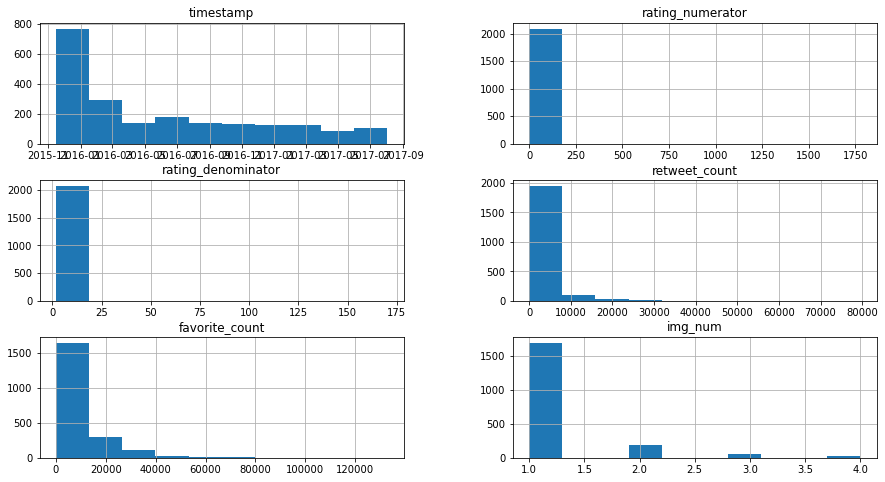

In [33]:
# EDA
twitter_achive_master.hist(figsize=(15,8))
plt.show()

In [34]:
twitter_achive_master['year'] = twitter_achive_master.timestamp.dt.year

### Question 1: Does the numerator rating influence the favorite and retweet count?

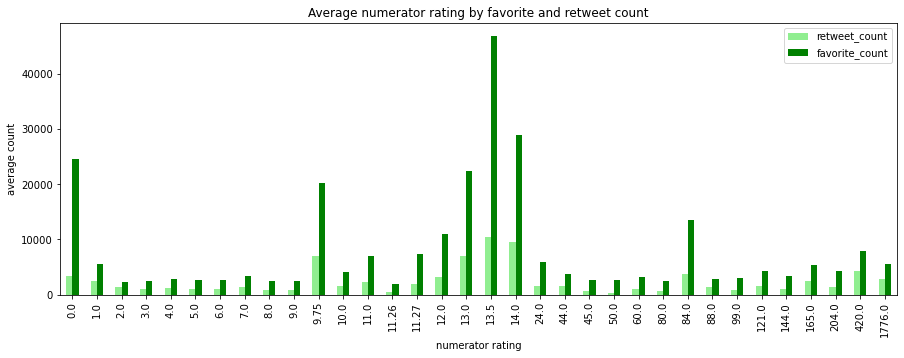

In [35]:
twitter_achive_master.groupby('rating_numerator').mean().plot(kind='bar', 
                                        y=['retweet_count','favorite_count'], 
                                        fontsize=10, 
                                        figsize=(15,5),
                                        color=['lightgreen', 'green'],
                                          )
plt.title('Average numerator rating by favorite and retweet count')
plt.xlabel('numerator rating')
plt.ylabel('average count')
plt.show()

>To demonstates the relationship between the favorite and retweet count on numerator ratings, the graph above showed that the mean rating above 10 have significantly higher favorite and retweet counts.

### Question 2: What is the correlation between the favorite and retweet count?

In [36]:
twitter_achive_master.favorite_count.corr(twitter_achive_master.retweet_count)

0.9111930256168023

> Correlation values of 0.91 indicates a strong positive linear relationship between the favorite and retweet counts.

### Question 3: Does the number of images improve the vote count of tweets on a yearly bases?

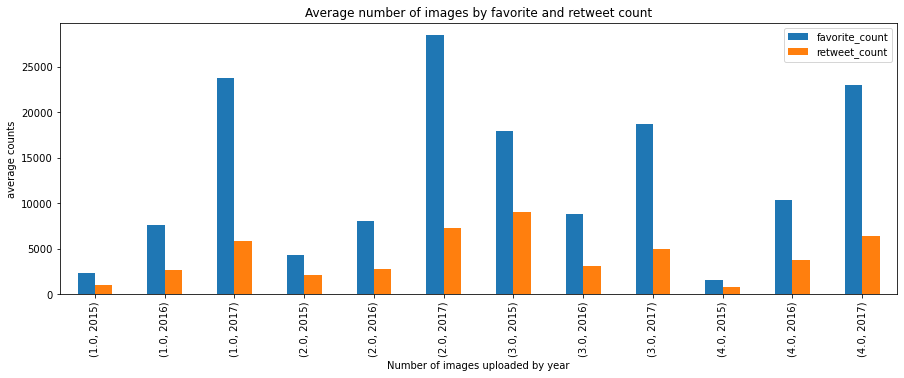

In [37]:
twitter_achive_master.groupby(['img_num', 'year'])[['favorite_count', 'retweet_count']].mean().plot(kind='bar',
                                                                                fontsize=10, 
                                                                                figsize=(15,5))
plt.title('Average number of images by favorite and retweet count')
plt.xlabel('Number of images uploaded by year')
plt.ylabel('average counts')
plt.show()

>The diagram indicates that the number of images does not ultimately lead to better engagement, as posts with 3 images express a decline in favorite and retweet counts.

### Conclusions:
To sum up everything that has been stated so far, there is a positive correlation of 0.91 between the favorite count and retweet count variables. 
Mean numerator rating above 10 have significantly higher favorite and retweet counts. However, posts with more images does not necessarily lead to better engagement.
>#### Limitations:
> Some dogs have multiple stages and if these stages were to be melted, this would result in the dataset being duplicated.
>